In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test)[0]
print("Prediction for test example 0:", pred)

Running LogisticRegression and SVC

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

#Sentiment analysis for movie reviews
In this exercise you'll explore the probabilities outputted by logistic regression on a subset of the Large Movie Review Dataset.

The variables X and y are already loaded into the environment. X contains features based on the number of times words appear in the movie reviews, and y contains labels for whether the review sentiment is positive (+1) or negative (-1).



In [ ]:
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

<script.py> output:
    Review: LOVED IT! This movie was amazing. Top 10 this year.
    Probability of positive review: 0.8079007873616059
    Review: Total junk! I'll never watch a film by that director again, no matter how good the reviews.
    Probability of positive review: 0.5855117402793947

print(review1_features) gives us this
(0, 6)	1
  (0, 9)	2
  (0, 11)	1
  (0, 15)	1
  (0, 317)	1
  (0, 405)	1
  (0, 437)	1
  (0, 459)	1

Visualizing decision boundaries
In this exercise, you'll visualize the decision boundaries of various classifier types.

A subset of scikit-learn's built-in wine dataset is already loaded into X, along with binary labels in y.
Binary labels means 0 if its not that variable, and 1 if its that and all else are 0 in that row
hero    zero    actor     actress

who is he
0        0        1         0
He is hero thus.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(),
               SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

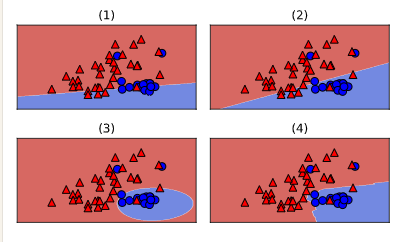

s you can see, logistic regression and linear SVM are linear classifiers whereas the default SVM and KNN are not.

#Minimizing a loss function

In [ ]:
# The squared error, summed over training examples
def my_loss(w):
    s = 0      #Squared error = 0 now
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]         #w@x means w(dot product)x, or weight*coefficient x
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x        #find x/coefficient that minimises my_loss, and we guess X[0] can be the answer..its a guess
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

#Comparing the logistic and hinge losses

In [ ]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

Implementing logistic regression

In [ ]:
# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

L1 makes coefficients zero for unimportant features- Lasso
L2, just reduces them - Ridge

Regularized logistic regression - l2

hIGHER THE C, lower the regularization

In [ ]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

#Smaller c means high regularization - Underfitting L1
#High C leads to small regularization of coeff - Overfitting L2

#Logistic regression and feature selection
In this exercise we'll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in X_train and y_train.

We'll search for the best value of C using scikit-learn's GridSearchCV()

In [ ]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

<script.py> output:
    Best CV params {'C': 1}
    Total number of features: 2500
    Number of selected features: 1220

    As you can see, a whole lot of features were discarded here.

#Identifying the most positive and negative words
In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for uS in the variable lr.

In addition, the words corresponding to the different features are loaded into the variable vocab. For example, since vocab[100] is "think", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.

In [ ]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

Regularization and probabilities

In [ ]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

Create a model with C=0.1 and examine how the plot and probabilities change.

In [ ]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

In [ ]:
lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

Fitting multi-class logistic regression

In [ ]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class="multinomial", solver="lbfgs")
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

In [ ]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

In [ ]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, svm_class_1)

#Effect of removing examples
Support vectors are defined as training examples that influence the decision boundary. In this exercise, you'll observe this behavior by removing non support vectors from the training set.

The wine quality dataset is already loaded into X and y (first two features only). (Note: we specify lims in plot_classifier() so that the two plots are forced to use the same axis limits and can be compared directly.)

In [ ]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X,y)
plot_classifier(X, y, svm, lims=(11,15,0,6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

In this exercise we'll search for the gamma that maximizes cross-validation accuracy using scikit-learn's GridSearchCV. A binary version of the handwritten digits dataset, in which you're just trying to predict whether or not an image is a "2", is already loaded into the variables X and y.

In [ ]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

In this exercise you'll search for the best combination of C and gamma using GridSearchCV.

In [ ]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

#Using SGDClassifier

In [ ]:
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

#Inverse of Regularization

What does C mean here in simple terms please? What is regularization strength?

Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. When you train a model such as a logistic regression model, you are choosing parameters that give you the best fit to the data. This means minimizing the error between what the model predicts for your dependent variable given your data compared to what your dependent variable actually is.

The problem comes when you have a lot of parameters (a lot of independent variables) but not too much data. In this case, the model will often tailor the parameter values to idiosyncrasies in your data -- which means it fits your data almost perfectly. However because those idiosyncrasies don't appear in future data you see, your model predicts poorly.

To solve this, as well as minimizing the error as already discussed, you add to what is minimized and also minimize a function that penalizes large values of the parameters. Most often the function is λΣθj2, which is some constant λ times the sum of the squared parameter values θj2. The larger λ is the less likely it is that the parameters will be increased in magnitude simply to adjust for small perturbations in the data. In your case however, rather than specifying λ, you specify C=1/λ.